<h1>Atividade 02 - melhorar o desempenho de RP em conjunto de dados existentes</h1>
<p>A atividade 02 visa trabalhar com um conjunto de dados pré-construído, onde as opções que o desenvolvedor tem, são de aplicar as técnicas de pré-processamento abaixo relacionadas:</p>
<ul><li>Seleção</li>
<li>Limpeza</li>
<li>Codificação</li>
<li>Enriquecimento</li>
<li>Normalização</li>
<li>Construção de Atributos</li>
<li>Correção de Prevalência</li>
<li>Partição do Conjunto de Dados</li>
</ul>
<p>Busque uma base de dados na UCI Machine Learning que seja indicada para problemas de classificação. (<a target="_blank" href="https://archive.ics.uci.edu/datasets">https://archive.ics.uci.edu/datasets</a>)</p>
<p>Para esse exemplo, vou usar a base de câncer de mama (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)</p>


Opção 01 - carregue o arquivo de dados da pasta local para o colab.


In [ ]:
import numpy as np
import pandas as pd

#
# base de dados disponível na UCI Machine Learning - https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
cancer_colunas = ['id','Diagnosis',
                  'radius_mean','texture_mean','perimeter_mean', 'area_mean',
                  'smoothness_mean','compactness_mean','concavity_mean',
                  'concave_mean','symmetry_mean','fractal_mean',

                  'radius_se','texture_se','perimeter_se', 'area_se','smoothness_se',
                  'compactness_se','concavity_se','concave_se','symmetry_se','fractal_se'

                  'radius_worst','texture_worst','perimeter_worst', 'area_worst',
                  'smoothness_worst','compactness_worst','concavity_worst',
                  'concave_worst','symmetry_worst','fractal_worst']
cancer = pd.read_csv('/content/wdbc.data',header=None,
                     names=cancer_colunas, lineterminator='\n', na_values='?')

# visualizar parte dos dados
print( cancer.head() )

#
# caso queira usar do google-drivre
#from google.colab import drive
#drive.mount('/content/drive')
#drive.mount(“/content/drive”, force_remount=True)

         id  Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
842302    M      17.99        10.38        122.80          1001.0    0.11840   
842517    M      20.57        17.77        132.90          1326.0    0.08474   
84300903  M      19.69        21.25        130.00          1203.0    0.10960   
84348301  M      11.42        20.38         77.58           386.1    0.14250   
84358402  M      20.29        14.34        135.10          1297.0    0.10030   

          smoothness_mean  compactness_mean  concavity_mean  concave_mean  \
842302            0.27760            0.3001         0.14710        0.2419   
842517            0.07864            0.0869         0.07017        0.1812   
84300903          0.15990            0.1974         0.12790        0.2069   
84348301          0.28390            0.2414         0.10520        0.2597   
84358402          0.13280            0.1980         0.10430        0.1809   

          ...  fractal_seradius_worst  texture_worst  pe

Para baixar direto da web e tratar arquivos compactados, sem o uso de arquivos locais.


In [140]:
# import requests, zipfile, io
from io import BytesIO
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  

# fetch dataset 
dataset = fetch_ucirepo(id=697) 


# data (as pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 
  
# metadata 
print("Dataset Metadata:")
print(dataset.metadata) 
  
# variable information 
print("\nVariable Information:")
print(dataset.variables) 

# Display information about the dataset
print("\nFeatures DataFrame Info:")
print(X.info())

print("\nFeatures DataFrame Summary:")
print(X.describe())

print("\nTarget Distribution:")
print(y['Target'].value_counts())



# r = requests.get('https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip')
# z = zipfile.ZipFile(io.BytesIO(r.content))
# z.namelist()
# dadosfp = z.open('wdbc.data')
# dados = dadosfp.read()
# cancer2 = pd.read_csv(io.BytesIO(dados),header=None,
#                      names=cancer_colunas, lineterminator='\n', na_values='?')
# print( cancer.head() )

# cancer.describe()

Dataset Metadata:
{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Features DataFrame Info:")
print(X.info())

print("\nFeatures DataFrame Summary:")
print(X.describe())

print("\nPrimeiras linhas das features:")
print(X.head())

print("\nVerificando valores nulos nas features:")
print(X.isnull().sum())

# Supondo que X ou X_orig seja seu DataFrame
print(X.columns)
constantes = [col for col in X.columns if X[col].nunique() == 1]
print("Atributos constantes:", constantes)

Features DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualifi


Target Distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


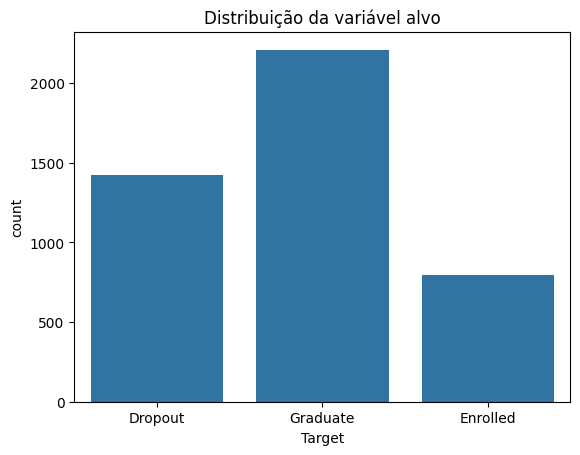

In [142]:
# 2. Distribuição do target
print("\nTarget Distribution:")
print(y['Target'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Target', data=y)
plt.title('Distribuição da variável alvo')
plt.show()

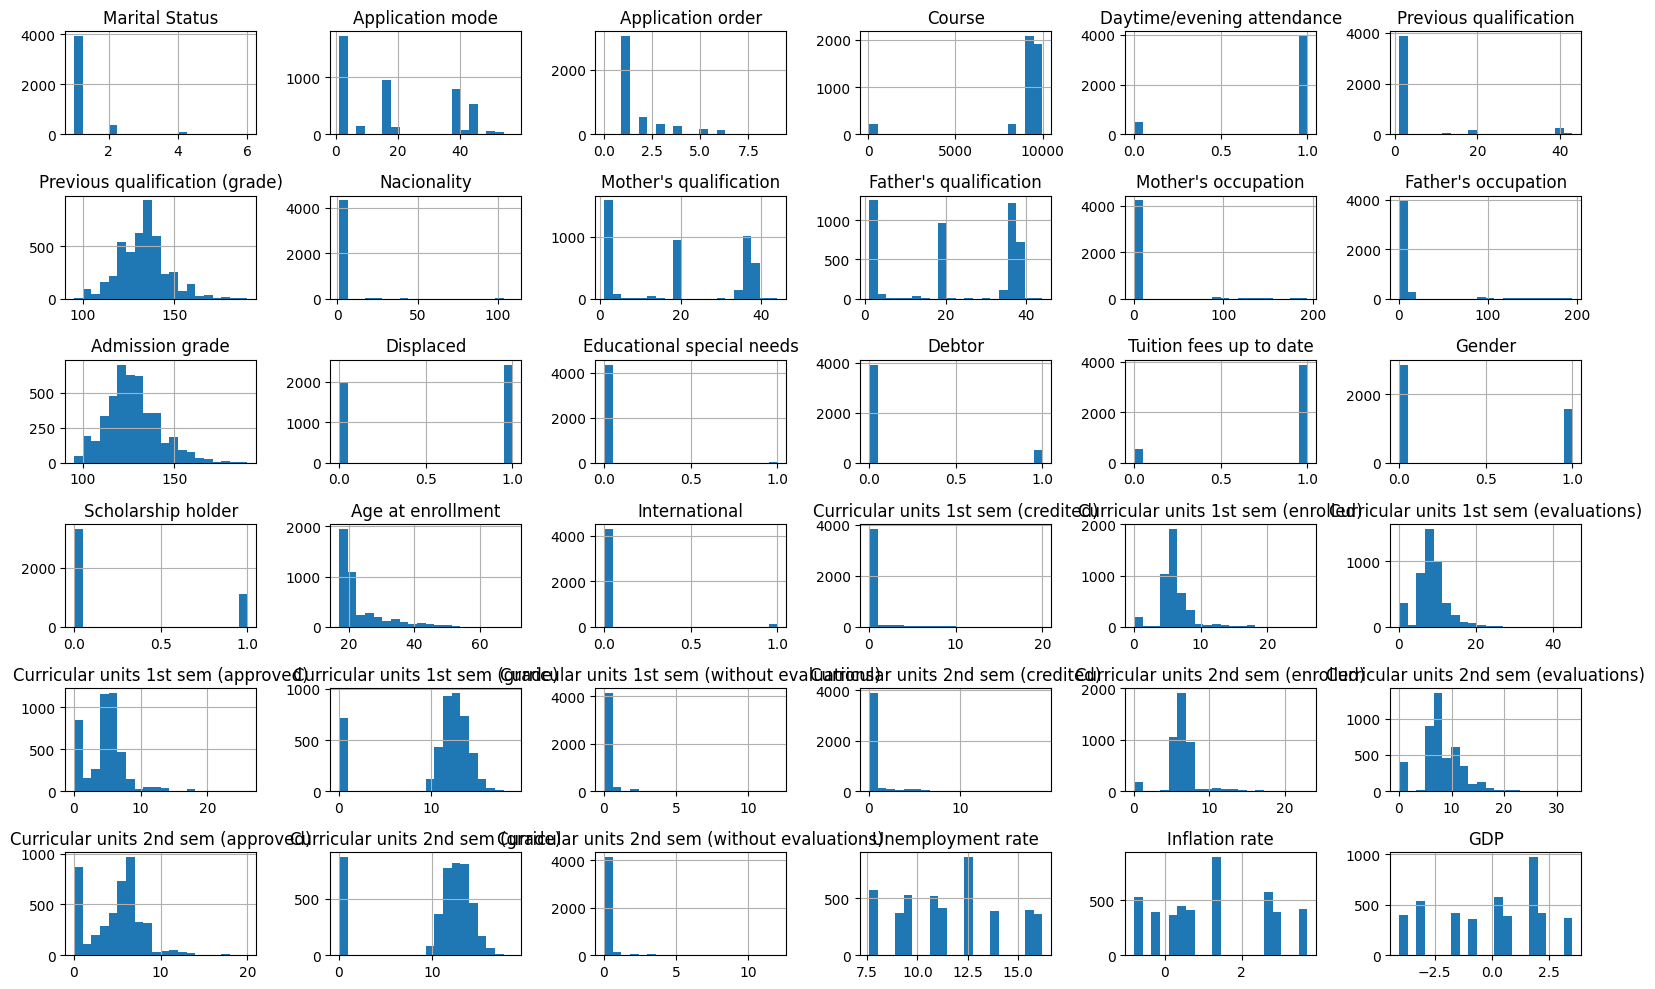

In [143]:
X.hist(bins=20, figsize=(16,10))
plt.tight_layout()
plt.show()



In [144]:
# Mostra todas as colunas das primeiras 5 linhas
print(X.head().to_string())

# Mostra contagem de valores nulos em todas as colunas
print(X.isnull().sum().to_string())

   Marital Status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  Previous qualification (grade)  Nacionality  Mother's qualification  Father's qualification  Mother's occupation  Father's occupation  Admission grade  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  International  Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  Curricular units 1st sem (without evaluations)  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  Curricular units 2nd sem (without evaluations)  Unemployment rate  Inflation rate   GDP
0               1                17                  5     171                           1   

In [145]:
X.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [59]:
for col in X.columns:
    print(f"{col}: {X[col].nunique()} únicos")

Marital Status: 6 únicos
Application mode: 18 únicos
Application order: 8 únicos
Course: 17 únicos
Daytime/evening attendance: 2 únicos
Previous qualification: 17 únicos
Previous qualification (grade): 101 únicos
Nacionality: 21 únicos
Mother's qualification: 29 únicos
Father's qualification: 34 únicos
Mother's occupation: 32 únicos
Father's occupation: 46 únicos
Admission grade: 620 únicos
Displaced: 2 únicos
Educational special needs: 2 únicos
Debtor: 2 únicos
Tuition fees up to date: 2 únicos
Gender: 2 únicos
Scholarship holder: 2 únicos
Age at enrollment: 46 únicos
International: 2 únicos
Curricular units 1st sem (credited): 21 únicos
Curricular units 1st sem (enrolled): 23 únicos
Curricular units 1st sem (evaluations): 35 únicos
Curricular units 1st sem (approved): 23 únicos
Curricular units 1st sem (grade): 797 únicos
Curricular units 1st sem (without evaluations): 11 únicos
Curricular units 2nd sem (credited): 19 únicos
Curricular units 2nd sem (enrolled): 22 únicos
Curricular u

In [146]:
# 3. Juntando tudo (opcional, só para facilitar)
df = pd.concat([X, y], axis=1)
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [61]:
# Salva os tipos de dados em um arquivo txt
X.dtypes.to_csv("dtypes_X.txt")

In [62]:
# Mostra o tipo de cada coluna, todas em uma linha
print(X.dtypes)

Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

<h2>Hora de realizar os tratamentos<h2>
<p>no exemplo, iremos normalizar as colunas, remover a coluna de identificação e separar a classe dos atributos.</p>

Acurácia: 0.4992469879518072
              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       427
    Enrolled       0.00      0.00      0.00       238
    Graduate       0.50      1.00      0.67       663

    accuracy                           0.50      1328
   macro avg       0.17      0.33      0.22      1328
weighted avg       0.25      0.50      0.33      1328



c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

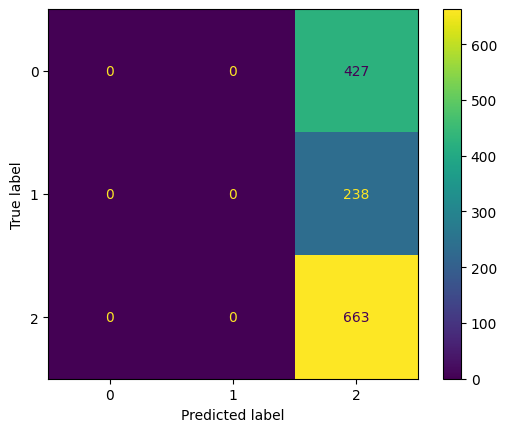

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# Use X e y['Target'] direto
X_train, X_test, y_train, y_test = train_test_split(
    X, y['Target'], test_size=0.3, random_state=42, stratify=y['Target']
)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [148]:

# Y vai ser a variável alvo, no seu caso: y['Target']
Y = y['Target']
Y_orig = y['Target'].copy()  # copia original, se precisar depois
X_orig = X.copy()
# Mostra os valores únicos do target (classes):
print(Y_orig.unique())
print(X_orig.head())


# X = cancer.iloc[:,2:]
# cols = cancer_colunas[2:]
# print(X.head())
# Y = cancer['id']
# Y_orig = cancer['id']
# print(Y.unique())

['Dropout' 'Graduate' 'Enrolled']
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2   

Na próxima seção que deverão ser realizada as tentativas de tratamento de dados, visando a melhoria no desempenho do classificador (SVM).

In [149]:
print("Shape X:", X.shape)
print("Shape Y:", Y.shape)

Shape X: (4424, 36)
Shape Y: (4424,)


In [155]:

from sklearn.preprocessing import minmax_scale
import pandas as pd


# Normalização min-max (mantendo nomes das colunas)
X = pd.DataFrame(minmax_scale(X_orig), columns=X_orig.columns)

print(Y.unique())
print(X.head())


# from sklearn.preprocessing import scale
# from sklearn.preprocessing import minmax_scale
# import pandas as pd

# X_orig =  X.copy()
# print(X_orig.head())

# print(Y_orig.unique() )

# # normalização min-max
# X = pd.DataFrame( minmax_scale(X) )

# print(X_orig.head())
# print(X.head())

# A normalização pode ser manual, usando o pandas... ex:
#X['radius_mean'] = (X_orig['radius_mean']-X_orig['radius_mean'].mean()) / X_orig['radius_mean'].std()
# normalização min-max
#X['texture_mean'] = (X_orig['texture_mean']-X_orig['texture_mean'].min()) / (X_orig['texture_mean'].max()-X_orig['texture_mean'].min())

['Dropout' 'Graduate' 'Enrolled']
   Marital Status  Application mode  Application order    Course  \
0             0.0          0.285714           0.555556  0.013858   
1             0.0          0.250000           0.111111  0.925989   
2             0.0          0.000000           0.555556  0.907512   
3             0.0          0.285714           0.222222  0.978108   
4             0.2          0.678571           0.111111  0.801466   

   Daytime/evening attendance  Previous qualification  \
0                         1.0                     0.0   
1                         1.0                     0.0   
2                         1.0                     0.0   
3                         1.0                     0.0   
4                         0.0                     0.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                        0.284211          0.0                0.418605   
1                        0.684211          0.0                0.00

A próxima seção trata da construção do modelo, dos testes e das métricas da matriz de confusão.

In [150]:
print(X.describe())


       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

In [156]:
from sklearn.model_selection import train_test_split
import numpy as np

# com os dados originais
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig,
                      Y_orig, test_size=0.25, stratify=Y_orig,random_state=10)

# com os dados tratados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                    stratify=Y,random_state=10)

Treina o modelo com base nos dados originais (SVM).

In [157]:

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo_orig = treinador.fit(X_orig_train, y_orig_train)

# predição com os mesmos dados usados para treinar
y_orig_pred = modelo_orig.predict(X_orig_train)
cm_orig_train = confusion_matrix(y_orig_train, y_orig_pred)
print('Matriz de confusão - com os dados ORIGINAIS usados no TREINAMENTO')
print(cm_orig_train)
print(classification_report(y_orig_train, y_orig_pred))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados ORIGINAIS usados para TESTES')
y2_orig_pred = modelo_orig.predict(X_orig_test)
cm_orig_test = confusion_matrix(y_orig_test, y2_orig_pred)
print(cm_orig_test)
print(classification_report(y_orig_test, y2_orig_pred))


Matriz de confusão - com os dados ORIGINAIS usados no TREINAMENTO
[[   0    0 1066]
 [   0    0  595]
 [   0    0 1657]]
              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00      1066
    Enrolled       0.00      0.00      0.00       595
    Graduate       0.50      1.00      0.67      1657

    accuracy                           0.50      3318
   macro avg       0.17      0.33      0.22      3318
weighted avg       0.25      0.50      0.33      3318

Matriz de confusão - com os dados ORIGINAIS usados para TESTES


c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

[[  0   0 355]
 [  0   0 199]
 [  0   0 552]]
              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       355
    Enrolled       0.00      0.00      0.00       199
    Graduate       0.50      1.00      0.67       552

    accuracy                           0.50      1106
   macro avg       0.17      0.33      0.22      1106
weighted avg       0.25      0.50      0.33      1106



c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Como os dados ficam após os processos de tratamento dos dados?

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo = treinador.fit(X_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados TRATADOS usados para TESTES')
y2_pred = modelo.predict(X_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred))


Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO
[[ 783  102  181]
 [  79  217  299]
 [  25   24 1608]]
              precision    recall  f1-score   support

     Dropout       0.88      0.73      0.80      1066
    Enrolled       0.63      0.36      0.46       595
    Graduate       0.77      0.97      0.86      1657

    accuracy                           0.79      3318
   macro avg       0.76      0.69      0.71      3318
weighted avg       0.78      0.79      0.77      3318

Matriz de confusão - com os dados ORIGINAIS usados para TESTES
[[255  37  63]
 [ 37  47 115]
 [ 14  12 526]]
              precision    recall  f1-score   support

     Dropout       0.83      0.72      0.77       355
    Enrolled       0.49      0.24      0.32       199
    Graduate       0.75      0.95      0.84       552

    accuracy                           0.75      1106
   macro avg       0.69      0.64      0.64      1106
weighted avg       0.73      0.75      0.72      1106



<h2> Verificar Correlação</h2>

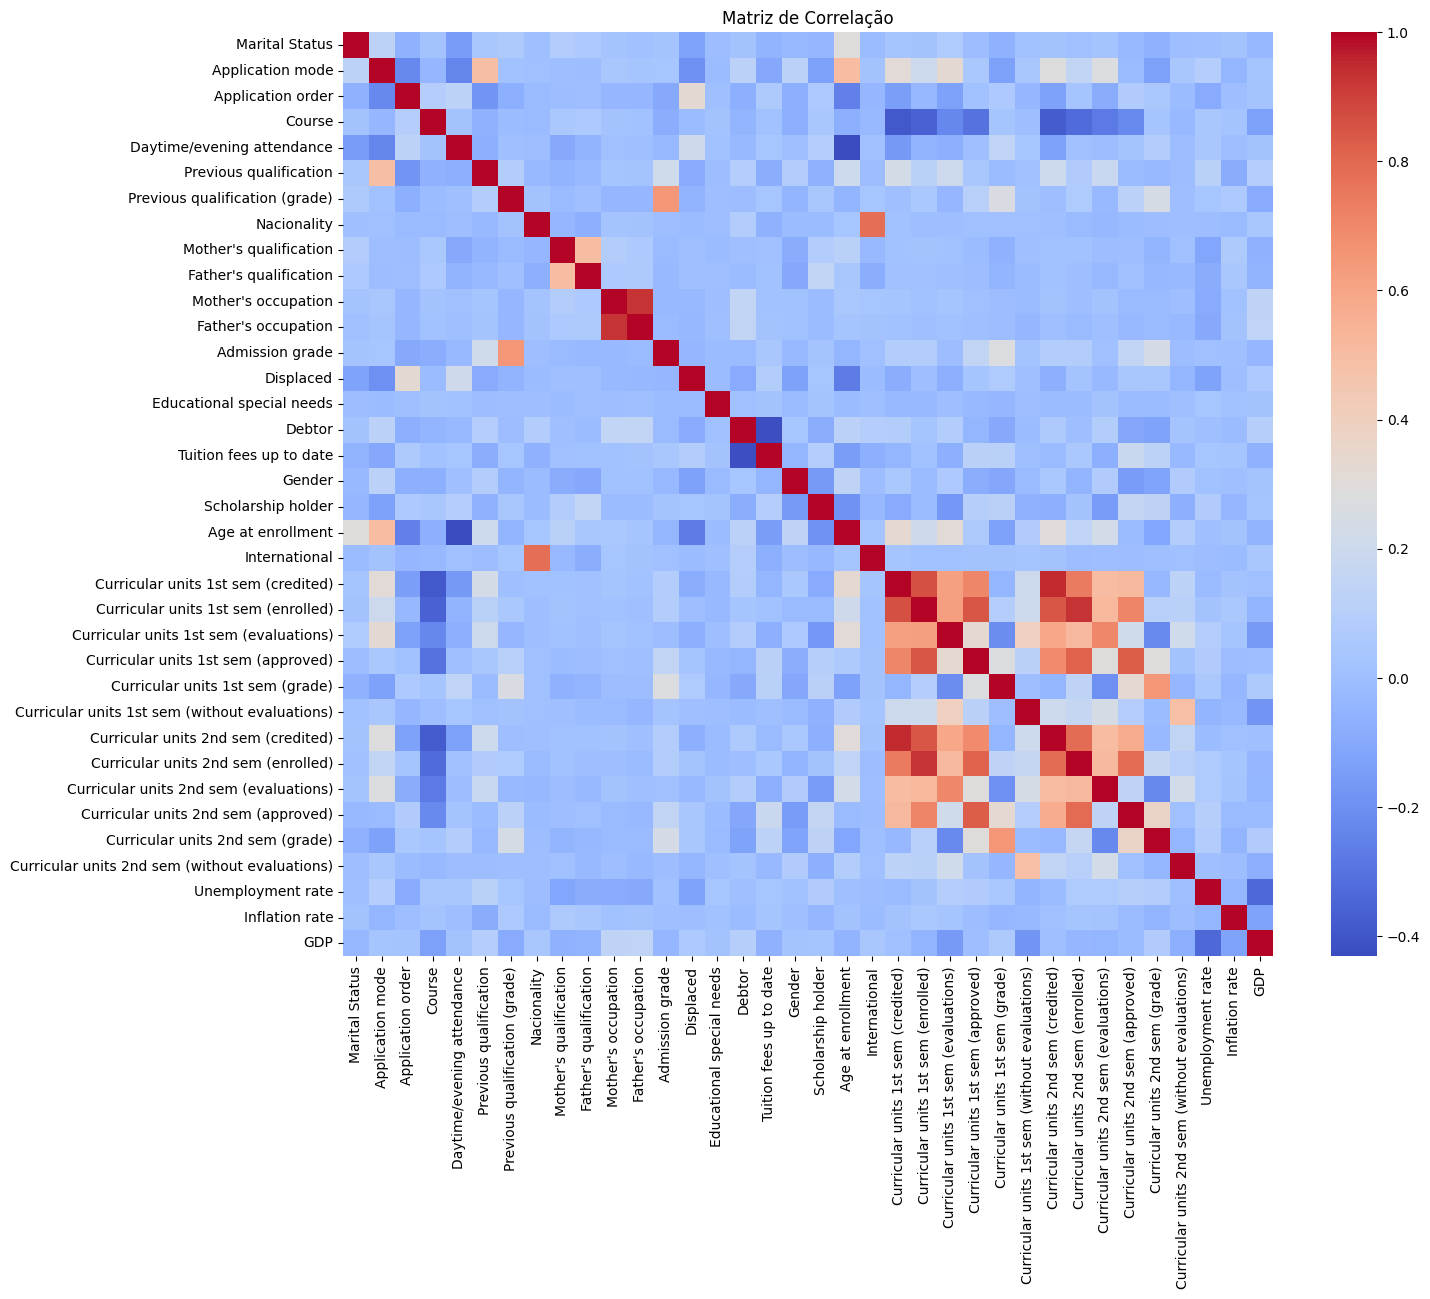

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Foi testado a exclusão de atributos correlatos e não resultou em melhora na acurácia, ou contrário, sem melhoras significativas nos demais indicadores.

In [ ]:
# Seleciona apenas a parte superior da matriz (sem duplicar pares)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Lista colunas que têm correlação absoluta maior que 0.9 com qualquer outra
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]
print("Atributos altamente correlacionados:", to_drop)

# Remove do DataFrame X essas colunas
X_corr = X.copy()
X = X.drop(columns=to_drop)

Atributos altamente correlacionados: ["Father's occupation", 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)']


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo = treinador.fit(X_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados TRATADOS usados para TESTES')
y2_pred = modelo.predict(X_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred))

Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO
[[ 783  110  173]
 [  80  207  308]
 [  29   23 1605]]
              precision    recall  f1-score   support

     Dropout       0.88      0.73      0.80      1066
    Enrolled       0.61      0.35      0.44       595
    Graduate       0.77      0.97      0.86      1657

    accuracy                           0.78      3318
   macro avg       0.75      0.68      0.70      3318
weighted avg       0.78      0.78      0.76      3318

Matriz de confusão - com os dados ORIGINAIS usados para TESTES
[[240  39  76]
 [ 34  61 104]
 [ 13  19 520]]
              precision    recall  f1-score   support

     Dropout       0.84      0.68      0.75       355
    Enrolled       0.51      0.31      0.38       199
    Graduate       0.74      0.94      0.83       552

    accuracy                           0.74      1106
   macro avg       0.70      0.64      0.65      1106
weighted avg       0.73      0.74      0.72      1106



Testado se há atributos com valor contínuos para remoção de outliers, mas o resultado não se apresentou relevante, mesmo eliminando as colunas correlatas depois.

In [93]:
# Volte ao X com todas as colunas
X = X_orig.copy()

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)

In [98]:
# Threshold: considere contínua se tem mais de 10 valores únicos
continuous_cols = [col for col in X.select_dtypes(include=['float64', 'int64']).columns
                   if X[col].nunique() > 10]

print("Prováveis variáveis contínuas:", continuous_cols)

for col in X.columns:
    print(f"{col}: {X[col].nunique()} valores únicos")

Prováveis variáveis contínuas: ['Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
Marital Status: 6 valores únicos
Application mode: 18 valores únicos
Application order: 8 valores únicos
Course: 17 valores únicos
Daytime/evening attendance: 2 valores únicos
Previous qualification: 17 valores únicos
Previous qualification (grade): 101 valores únicos
Nacionality: 21 

Gerando relatório para analisar os dados

In [100]:
relatorio = []

for col in X_orig.columns:
    col_info = []
    col_info.append(f"Nome: {col}")
    col_info.append(f"Tipo: {X_orig[col].dtype}")
    nunique = X_orig[col].nunique()
    col_info.append(f"Nº de valores únicos: {nunique}")
    
    # Mostra até 15 valores únicos, para não estourar o arquivo
    uniques = X_orig[col].unique()
    if nunique <= 15:
        col_info.append(f"Valores únicos: {uniques}")
    else:
        col_info.append(f"Amostra dos valores únicos: {uniques[:15]} ...")
    
    # Mostra 5 primeiros valores da coluna
    col_info.append(f"Amostra de valores: {X_orig[col].head(5).tolist()}")
    
    relatorio.append("\n".join(col_info))
    relatorio.append("-"*50)

# Salva tudo em um txt
with open('detalhes_atributos_X_orig.txt', 'w', encoding='utf-8') as f:
    f.write("\n\n".join(relatorio))

print("Relatório salvo em detalhes_atributos_X_orig.txt")

Relatório salvo em detalhes_atributos_X_orig.txt


In [102]:
relatorio = []

for col in X.columns:
    col_info = []
    col_info.append(f"Nome: {col}")
    col_info.append(f"Tipo: {X[col].dtype}")
    nunique = X[col].nunique()
    col_info.append(f"Nº de valores únicos: {nunique}")
    
    # Mostra até 15 valores únicos, para não estourar o arquivo
    uniques = X[col].unique()
    if nunique <= 15:
        col_info.append(f"Valores únicos: {uniques}")
    else:
        col_info.append(f"Amostra dos valores únicos: {uniques[:15]} ...")
    
    # Mostra 5 primeiros valores da coluna
    col_info.append(f"Amostra de valores: {X[col].head(5).tolist()}")
    
    relatorio.append("\n".join(col_info))
    relatorio.append("-"*50)

# Salva tudo em um txt
with open('detalhes_atributos.txt', 'w', encoding='utf-8') as f:
    f.write("\n\n".join(relatorio))

print("Relatório salvo em detalhes_atributos.txt")

Relatório salvo em detalhes_atributos.txt


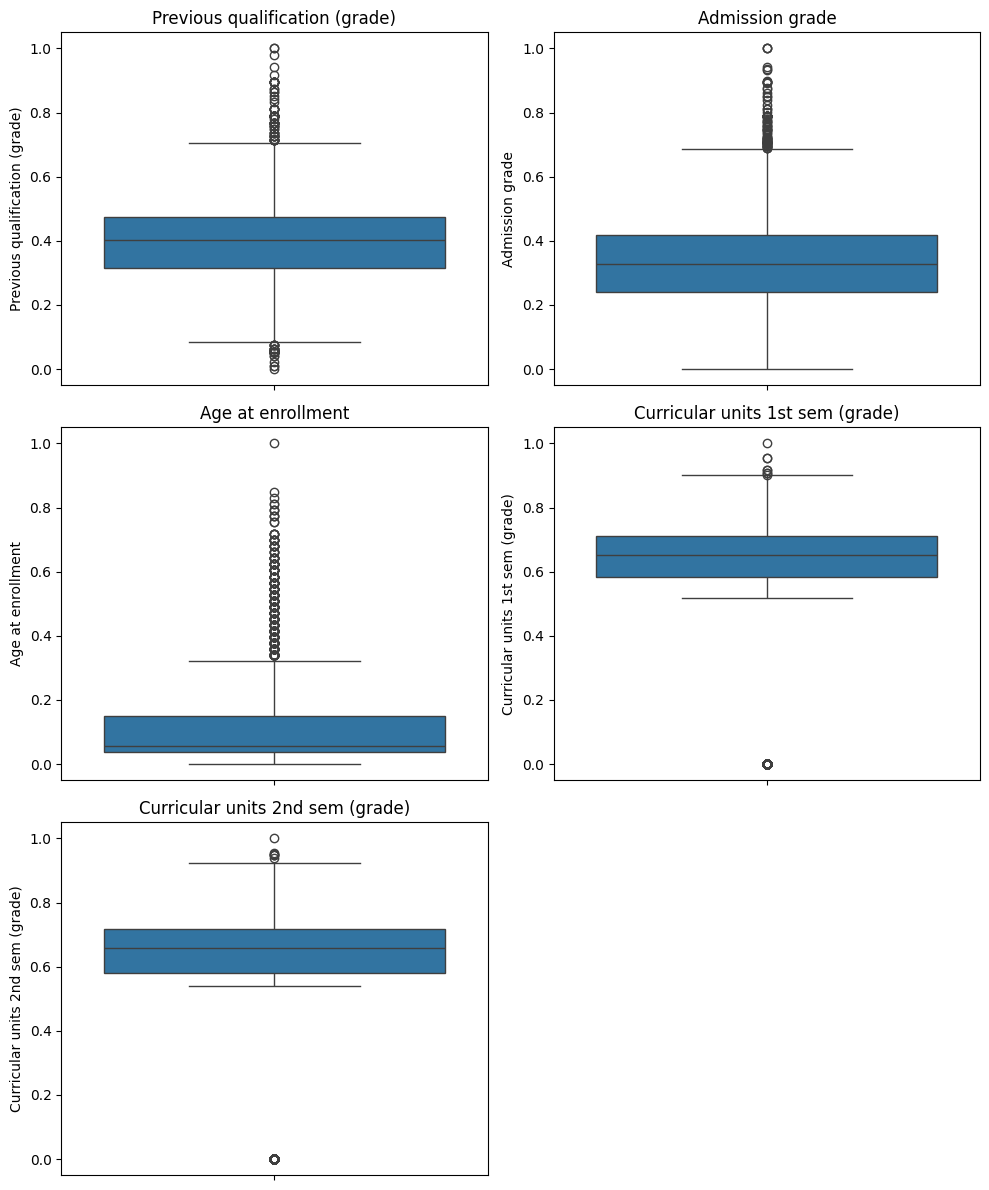

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que X_orig seja seu DataFrame original, sem normalização

variaveis_continuas_individuais = [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)"
]

# Apenas as que existem no seu DataFrame
variaveis_presentes = [v for v in variaveis_continuas_individuais if v in X_orig.columns]

n_cols = 2
n_rows = (len(variaveis_presentes) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*5, n_rows*4))

for idx, col in enumerate(variaveis_presentes):
    plt.subplot(n_rows, n_cols, idx+1)
    sns.boxplot(y=X_orig[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

A análise exploratória de boxplots mostrou a presença de uma quantidade significativa de outliers em variáveis contínuas (como notas, idade e médias de desempenho acadêmico). Valores extremos também foram observados em variáveis discretas relacionadas a contagem de disciplinas cursadas, aprovadas ou avaliadas.

In [109]:
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



#cria variáveis dos dados sem os ouliers a partir de uma cópia do DataFrame original
def remove_outliers_iqr(df, columns):
    df_no_out = df.copy()
    for col in columns:
        Q1 = df_no_out[col].quantile(0.25)
        Q3 = df_no_out[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = (df_no_out[col] >= Q1 - 1.5 * IQR) & (df_no_out[col] <= Q3 + 1.5 * IQR)
        df_no_out = df_no_out[mask]
    return df_no_out


# Variáveis contínuas individuais
variaveis_continuas_individuais = [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)"
]

# Sem outliers
X2 = remove_outliers_iqr(X, variaveis_continuas_individuais)
# Alinhar o y para os índices dos dados sem outlier
y2 = y.loc[X2.index]

# Normalização Min-Max
X_norm = pd.DataFrame(minmax_scale(X), columns=X.columns)
X2_norm = pd.DataFrame(minmax_scale(X2), columns=X2.columns)

# Split train/test (mesmo random_state para ambos, mas dados diferentes)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42, stratify=y)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_norm, y2, test_size=0.25, random_state=42, stratify=y2)

# Treinando SVM
clf1 = SVC()
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)

clf2 = SVC()
clf2.fit(X2_train, y2_train)
pred2 = clf2.predict(X2_test)

# Resultados
print("=== Com Outliers ===")
print("Acurácia:", accuracy_score(y_test, pred1))
print(classification_report(y_test, pred1))

print("\n=== Sem Outliers ===")
print("Acurácia:", accuracy_score(y2_test, pred2))
print(classification_report(y2_test, pred2))



c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Com Outliers ===
Acurácia: 0.7423146473779385
              precision    recall  f1-score   support

     Dropout       0.84      0.68      0.75       355
    Enrolled       0.51      0.31      0.38       199
    Graduate       0.74      0.94      0.83       552

    accuracy                           0.74      1106
   macro avg       0.70      0.64      0.65      1106
weighted avg       0.73      0.74      0.72      1106


=== Sem Outliers ===
Acurácia: 0.7127371273712737
              precision    recall  f1-score   support

     Dropout       0.67      0.37      0.47       131
    Enrolled       0.48      0.33      0.39       153
    Graduate       0.76      0.94      0.84       454

    accuracy                           0.71       738
   macro avg       0.64      0.55      0.57       738
weighted avg       0.69      0.71      0.68       738



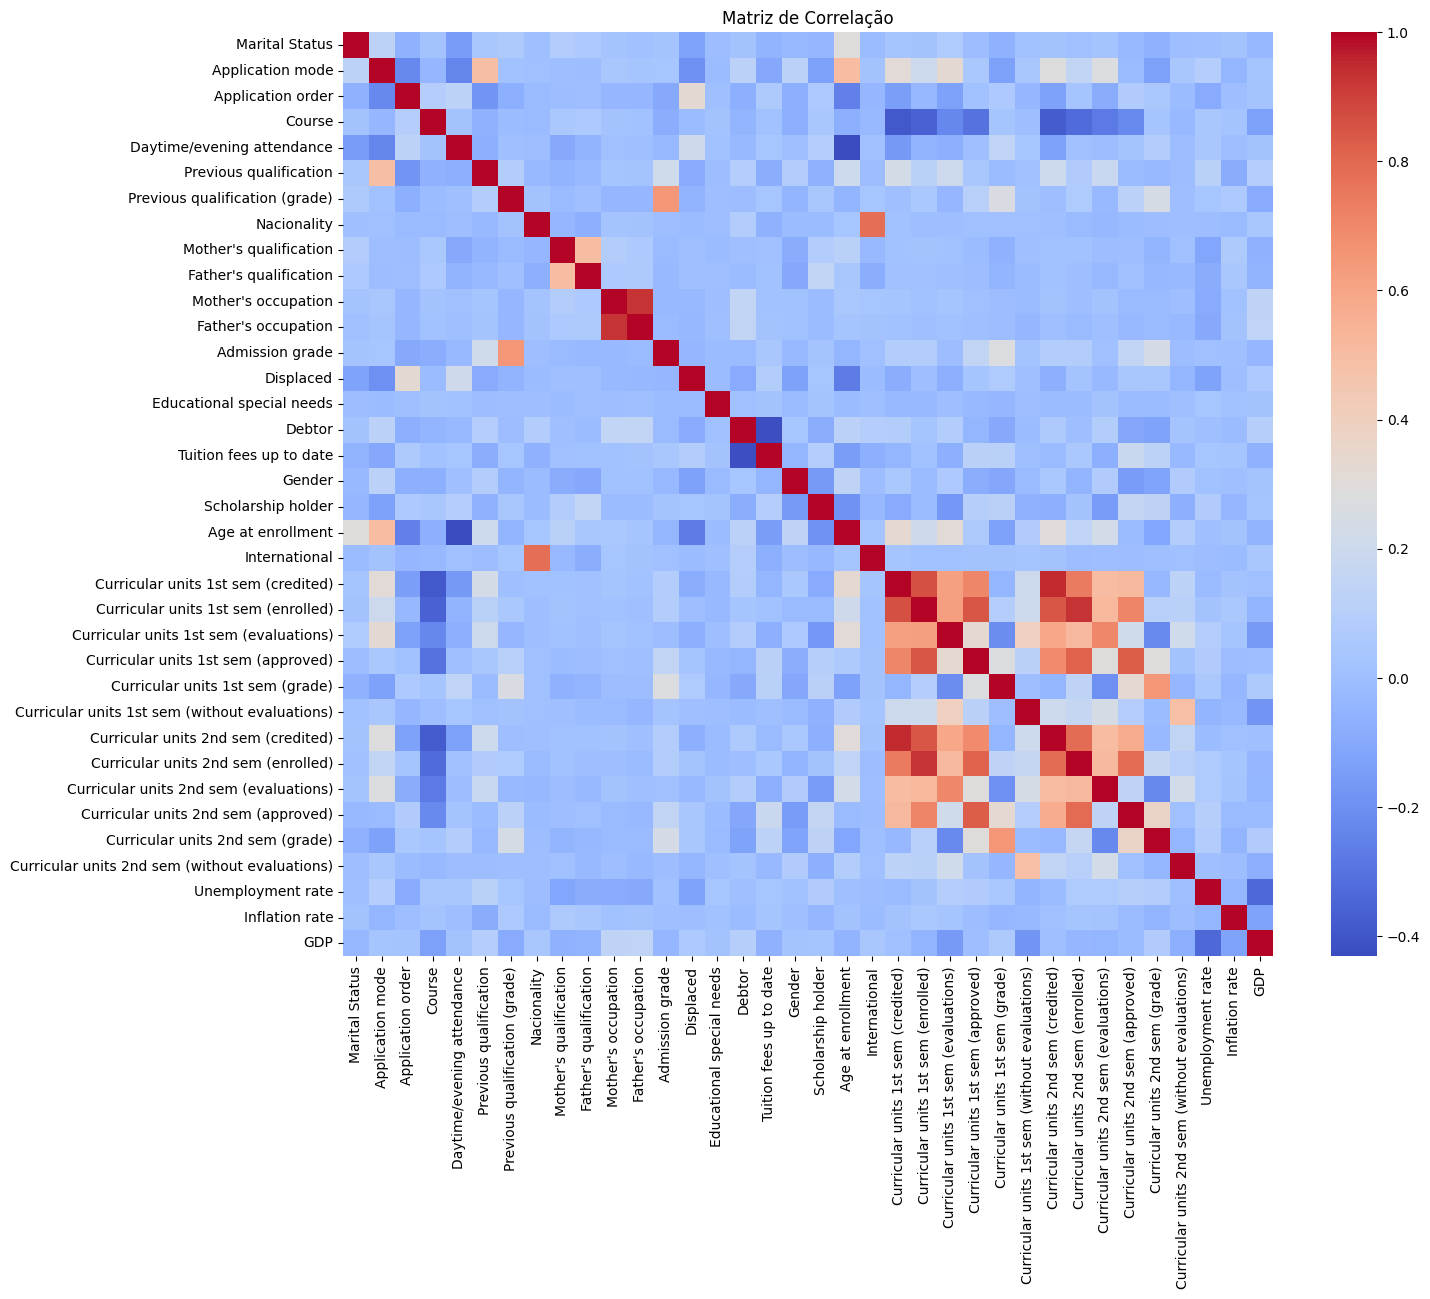

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

corr1= X_norm.corr()
corr2= X2_norm.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr2, annot=False, cmap='coolwarm')

plt.title('Matriz de Correlação')
plt.show()

In [120]:
# Seleciona apenas a parte superior da matriz (sem duplicar pares)
upper1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(bool))
upper2 = corr2.where(np.triu(np.ones(corr2.shape), k=1).astype(bool))

# Lista colunas que têm correlação absoluta maior que 0.9 com qualquer outra
to_drop1 = [column for column in upper1.columns if any(upper1[column].abs() > 0.85)]
to_drop2 = [column for column in upper2.columns if any(upper2[column].abs() > 0.85)]
print("Atributos altamente correlacionados X1:", to_drop1)
print("Atributos altamente correlacionados X2:", to_drop2)

# Remove do DataFrame X essas colunas
X_sem_corr = X_norm.copy()
X_sem_corr = X_sem_corr.drop(columns=to_drop1)
X2_sem_corr = X2_norm.copy()
X2_sem_corr = X2_sem_corr.drop(columns=to_drop2)

Atributos altamente correlacionados X1: ["Father's occupation", 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)']
Atributos altamente correlacionados X2: ["Father's occupation", 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)']


In [121]:
# Split train/test (mesmo random_state para ambos, mas dados diferentes)
X_sem_corr_train, X_sem_corr_test, y_train, y_test = train_test_split(X_sem_corr, y, test_size=0.25, random_state=42, stratify=y)
X2_sem_corr_train, X2_sem_corr_test, y2_train, y2_test = train_test_split(X2_sem_corr, y2, test_size=0.25, random_state=42, stratify=y2)

# Treinando SVM
clf1 = SVC()
clf1.fit(X_sem_corr_train, y_train)
pred1 = clf1.predict(X_sem_corr_test)

clf2 = SVC()
clf2.fit(X2_sem_corr_train, y2_train)
pred2 = clf2.predict(X2_sem_corr_test)

# Resultados
print("=== Com Outliers ===")
print("Acurácia:", accuracy_score(y_test, pred1))
print(classification_report(y_test, pred1))

print("\n=== Sem Outliers ===")
print("Acurácia:", accuracy_score(y2_test, pred2))
print(classification_report(y2_test, pred2))


c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Com Outliers ===
Acurácia: 0.7278481012658228
              precision    recall  f1-score   support

     Dropout       0.84      0.65      0.74       355
    Enrolled       0.54      0.22      0.31       199
    Graduate       0.71      0.96      0.81       552

    accuracy                           0.73      1106
   macro avg       0.70      0.61      0.62      1106
weighted avg       0.72      0.73      0.70      1106


=== Sem Outliers ===
Acurácia: 0.7195121951219512
              precision    recall  f1-score   support

     Dropout       0.68      0.38      0.49       131
    Enrolled       0.50      0.35      0.41       153
    Graduate       0.77      0.94      0.85       454

    accuracy                           0.72       738
   macro avg       0.65      0.56      0.58       738
weighted avg       0.70      0.72      0.69       738



Foi realizada a remoção de outliers nas variáveis contínuas individuais, bem como a exclusão de atributos altamente correlacionados. Contudo, tais procedimentos não resultaram em melhora nas métricas de desempenho do modelo SVM. Isso sugere que os valores considerados outliers são, na realidade, parte legítima da variabilidade dos estudantes, e que variáveis correlacionadas ainda contribuem com informações relevantes para o processo de classificação. Assim, optou-se por manter todos os dados e atributos para o modelo final.

Testando o mesmo modelo com parâmetro de balanceamento de classes, tendo em vista que a alta acurácia em relação ao recall e o f1-score sugere um problema de prevalência dos dados de graduados.

In [159]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

# Cria o SVM com balanceamento automático das classes
treinador = svm.SVC(class_weight='balanced')

# Treina o modelo
modelo = treinador.fit(X_train, y_train)

# Predição com os dados de treino
y_pred = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

# Predição com os dados de teste
y2_pred = modelo.predict(X_test)
cm_test = confusion_matrix(y_test, y2_pred)
print('Matriz de confusão - com os dados TRATADOS usados para TESTES')
print(cm_test)
print(classification_report(y_test, y2_pred))

Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO
[[ 729  240   97]
 [  49  433  113]
 [  51  249 1357]]
              precision    recall  f1-score   support

     Dropout       0.88      0.68      0.77      1066
    Enrolled       0.47      0.73      0.57       595
    Graduate       0.87      0.82      0.84      1657

    accuracy                           0.76      3318
   macro avg       0.74      0.74      0.73      3318
weighted avg       0.80      0.76      0.77      3318

Matriz de confusão - com os dados TRATADOS usados para TESTES
[[237  82  36]
 [ 31 115  53]
 [ 14  90 448]]
              precision    recall  f1-score   support

     Dropout       0.84      0.67      0.74       355
    Enrolled       0.40      0.58      0.47       199
    Graduate       0.83      0.81      0.82       552

    accuracy                           0.72      1106
   macro avg       0.69      0.69      0.68      1106
weighted avg       0.76      0.72      0.73      1106



Verificando como as classes se separam no espaço das variáveis para o valores contínuos

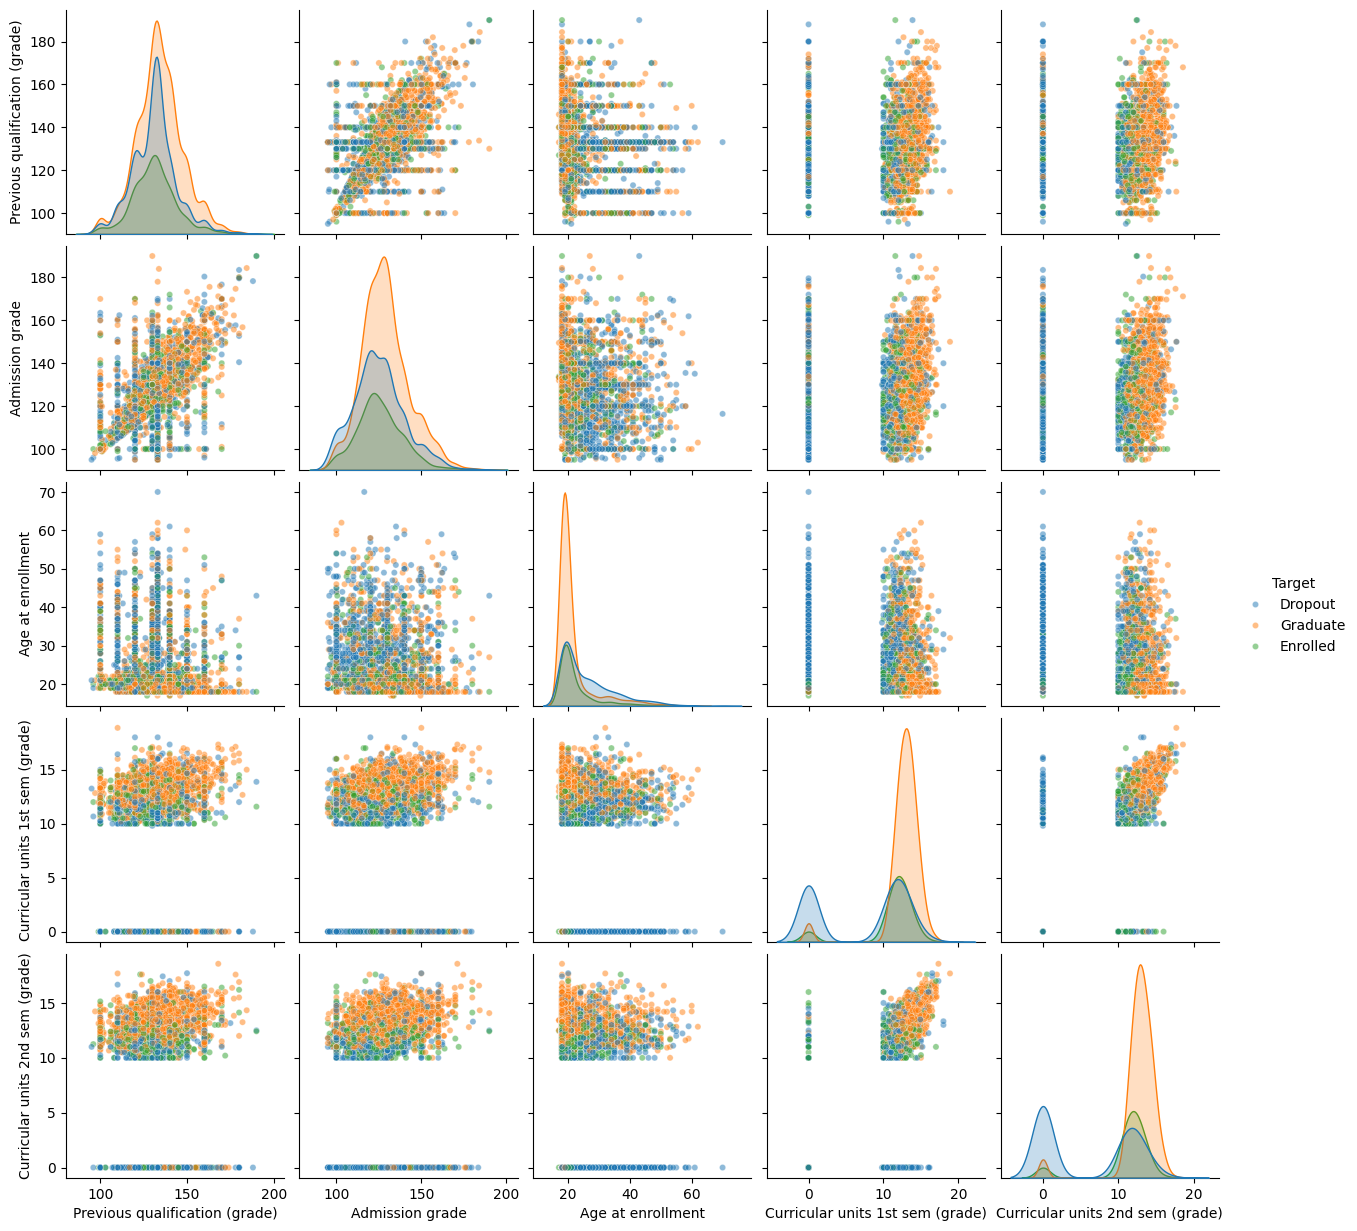

In [160]:
import seaborn as sns
import pandas as pd

# Junta X e y em um único DataFrame para o pairplot
df_plot = X_orig.copy()
df_plot['Target'] = Y.values  # ou y['Target'].values, conforme seu caso

# Só variáveis contínuas + target
cols_plot = [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Target"
]
sns.pairplot(df_plot[cols_plot], hue='Target', plot_kws={'alpha':0.5, 's':20})

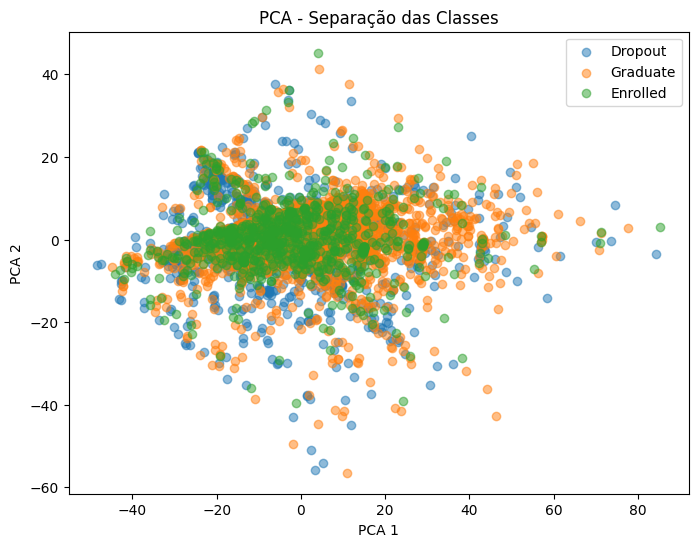

In [161]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_orig[cols_plot[:-1]])

plt.figure(figsize=(8,6))
for t in df_plot['Target'].unique():
    idx = df_plot['Target'] == t
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=str(t), alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.title("PCA - Separação das Classes")
plt.show()

Testando a importância das variáveis

                                           feature  importance
31                Curricular units 2nd sem (grade)    0.104611
30             Curricular units 2nd sem (approved)    0.094846
16                         Tuition fees up to date    0.064738
24             Curricular units 1st sem (approved)    0.029476
25                Curricular units 1st sem (grade)    0.017812
29          Curricular units 2nd sem (evaluations)    0.014467
18                              Scholarship holder    0.009765
1                                 Application mode    0.006329
15                                          Debtor    0.005335
23          Curricular units 1st sem (evaluations)    0.005063
5                           Previous qualification    0.002984
17                                          Gender    0.002893
11                             Father's occupation    0.001537
9                           Father's qualification    0.001447
4                       Daytime/evening attendance    0

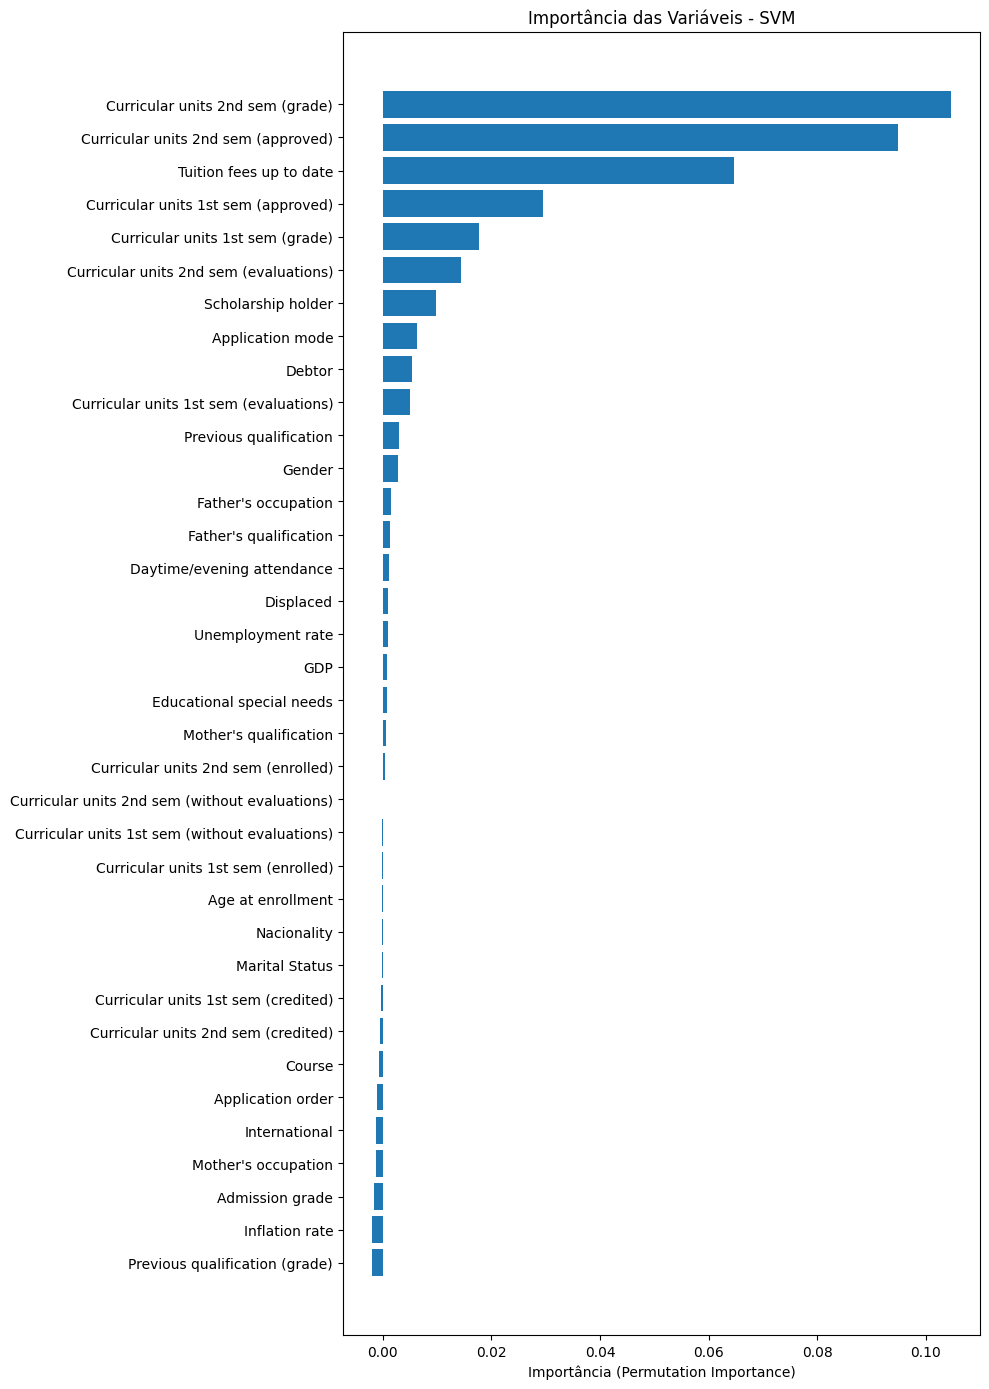

In [164]:
from sklearn.inspection import permutation_importance
import pandas as pd

pd.set_option('display.max_rows', 40)  # mostra até 50 linhas no DataFrame

# Supondo que seu modelo SVM já foi treinado (por exemplo, com kernel RBF)
# e que X_test e y_test estejam prontos

# Calcule a importância por permutação
result = permutation_importance(
    modelo,       # seu modelo já treinado (ex: clf, modelo, etc)
    X_test,       # conjunto de teste (já normalizado)
    y_test,       # rótulos de teste
    n_repeats=10,
    random_state=42,
    scoring='accuracy'  # ou outro critério de avaliação
)

# Monte um DataFrame com os resultados
imp_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

print(imp_df)

# Opcional: plotar as importâncias
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 14))  # aumente a altura para acomodar 36 variáveis
plt.barh(imp_df['feature'], imp_df['importance'])
plt.gca().invert_yaxis()  # deixa a mais importante no topo
plt.xlabel('Importância (Permutation Importance)')
plt.title('Importância das Variáveis - SVM')
plt.tight_layout()  # melhora o espaçamento automático
plt.show()


In [166]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Lista de métricas para comparar
metricas = ['accuracy', 'recall_macro', 'f1_macro', 'precision_macro']

# Dicionário para guardar os rankings de cada métrica
importancias = {}

for metrica in metricas:
    result = permutation_importance(
        modelo,       # seu modelo já treinado
        X_test,       # conjunto de teste
        y_test,       # rótulos de teste
        n_repeats=10,
        random_state=42,
        scoring=metrica
    )
    imp = pd.DataFrame({
        'feature': X_test.columns,
        f'import_{metrica}': result.importances_mean
    }).set_index('feature')
    importancias[metrica] = imp

# Junta todos os rankings em um único DataFrame
df_importancias = pd.concat(importancias.values(), axis=1)
print(df_importancias.sort_values(by='import_f1_macro', ascending=False))

# Opcional: gráfico comparativo (para uma métrica de cada vez)
for metrica in metricas:
    plt.figure(figsize=(10, 14))
    sorted_df = df_importancias.sort_values(by=f'import_{metrica}', ascending=True)
    plt.barh(sorted_df.index, sorted_df[f'import_{metrica}'])
    plt.xlabel(f'Importância ({metrica})')
    plt.title(f'Importância das Variáveis ({metrica})')
    plt.tight_layout()
    plt.show()

df_importancias.to_csv("importancias_variaveis_multimetricas.csv")


KeyboardInterrupt: 

                                                import_accuracy  \
feature                                                           
Marital Status                                        -0.000181   
Application mode                                       0.006329   
Application order                                     -0.001085   
Course                                                -0.000633   
Daytime/evening attendance                             0.001175   
Previous qualification                                 0.002984   
Previous qualification (grade)                        -0.001989   
Nacionality                                           -0.000181   
Mother's qualification                                 0.000633   
Father's qualification                                 0.001447   
Mother's occupation                                   -0.001175   
Father's occupation                                    0.001537   
Admission grade                                       -0.00153

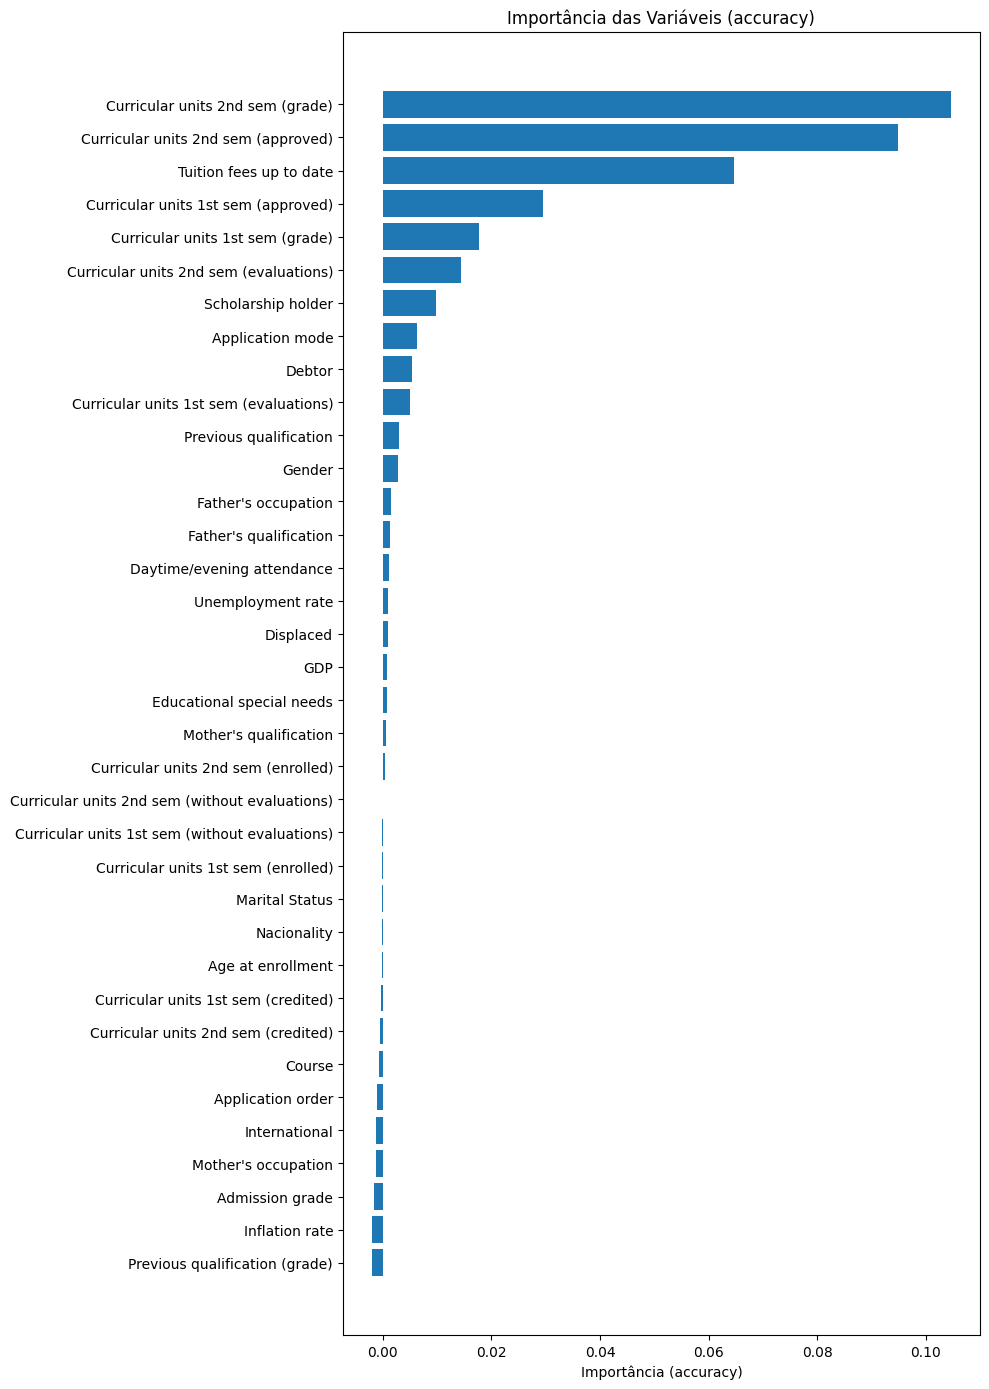

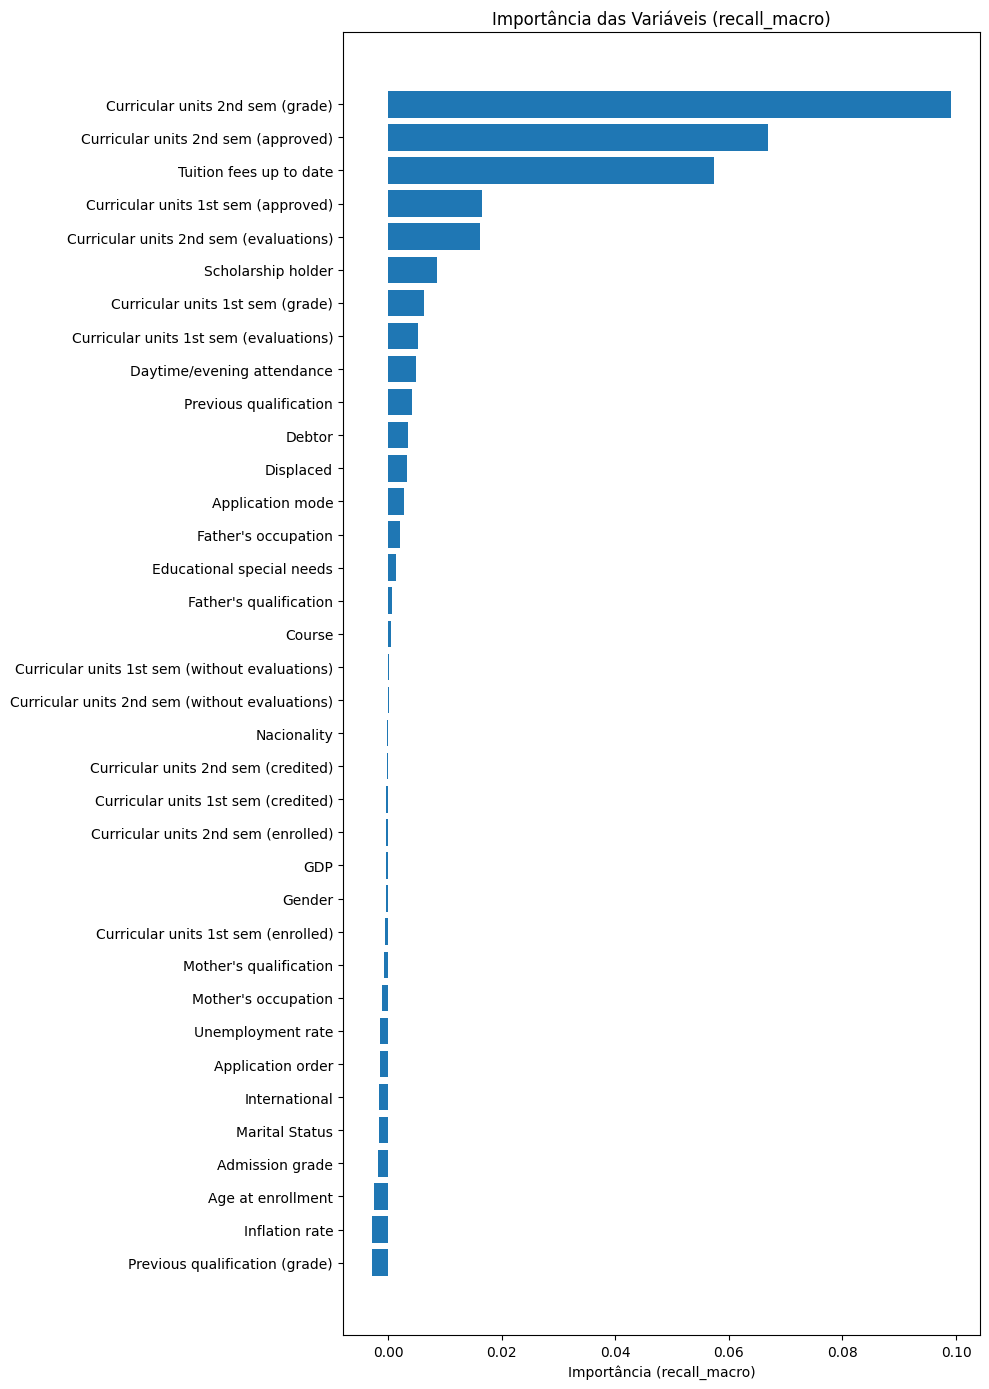

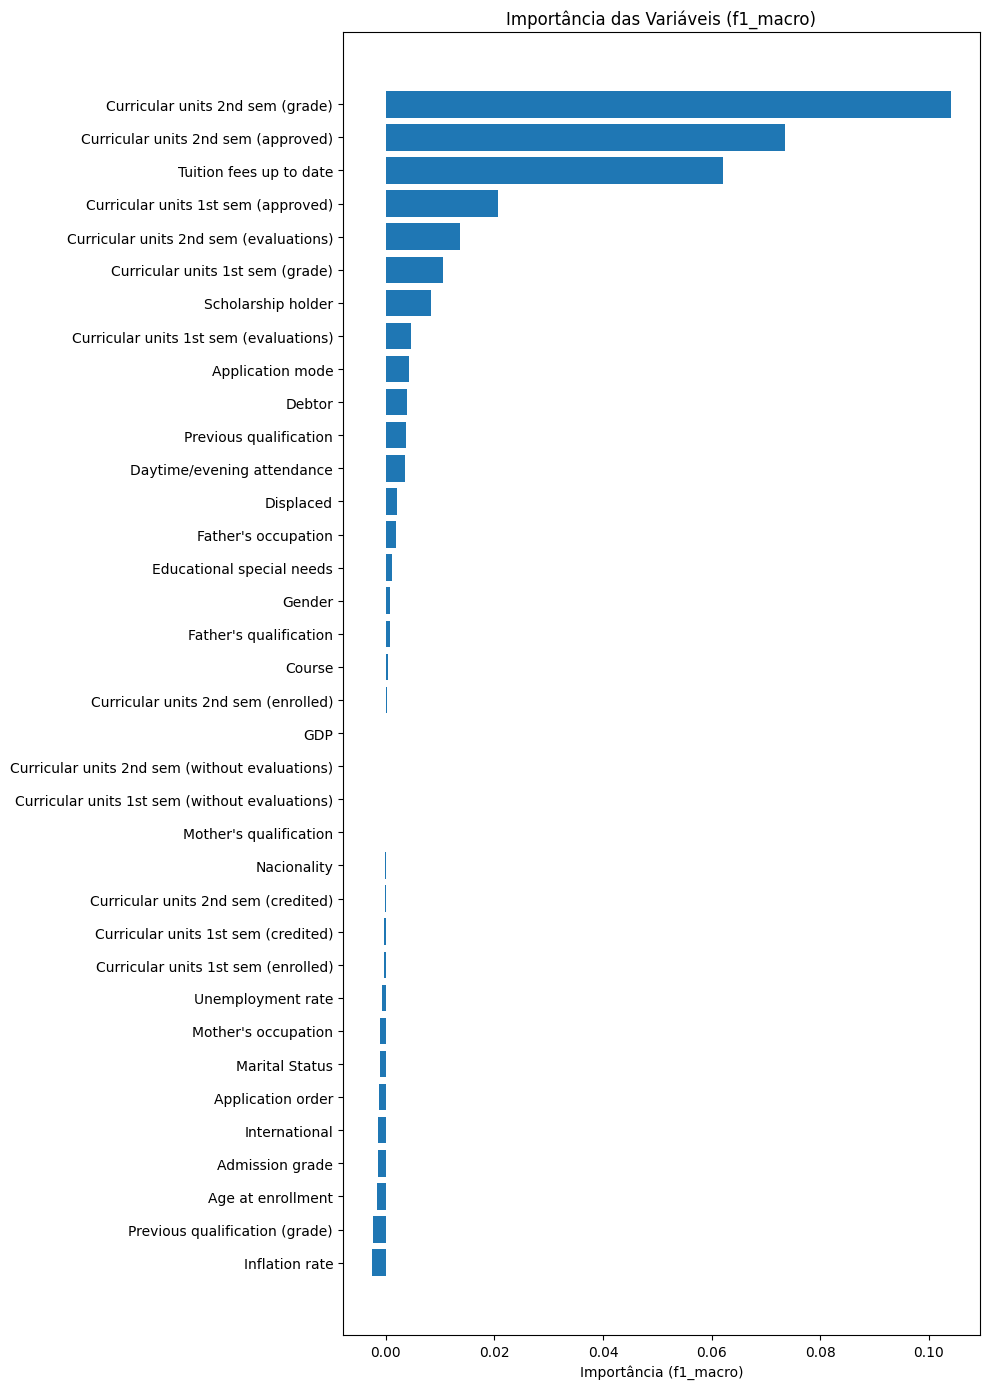

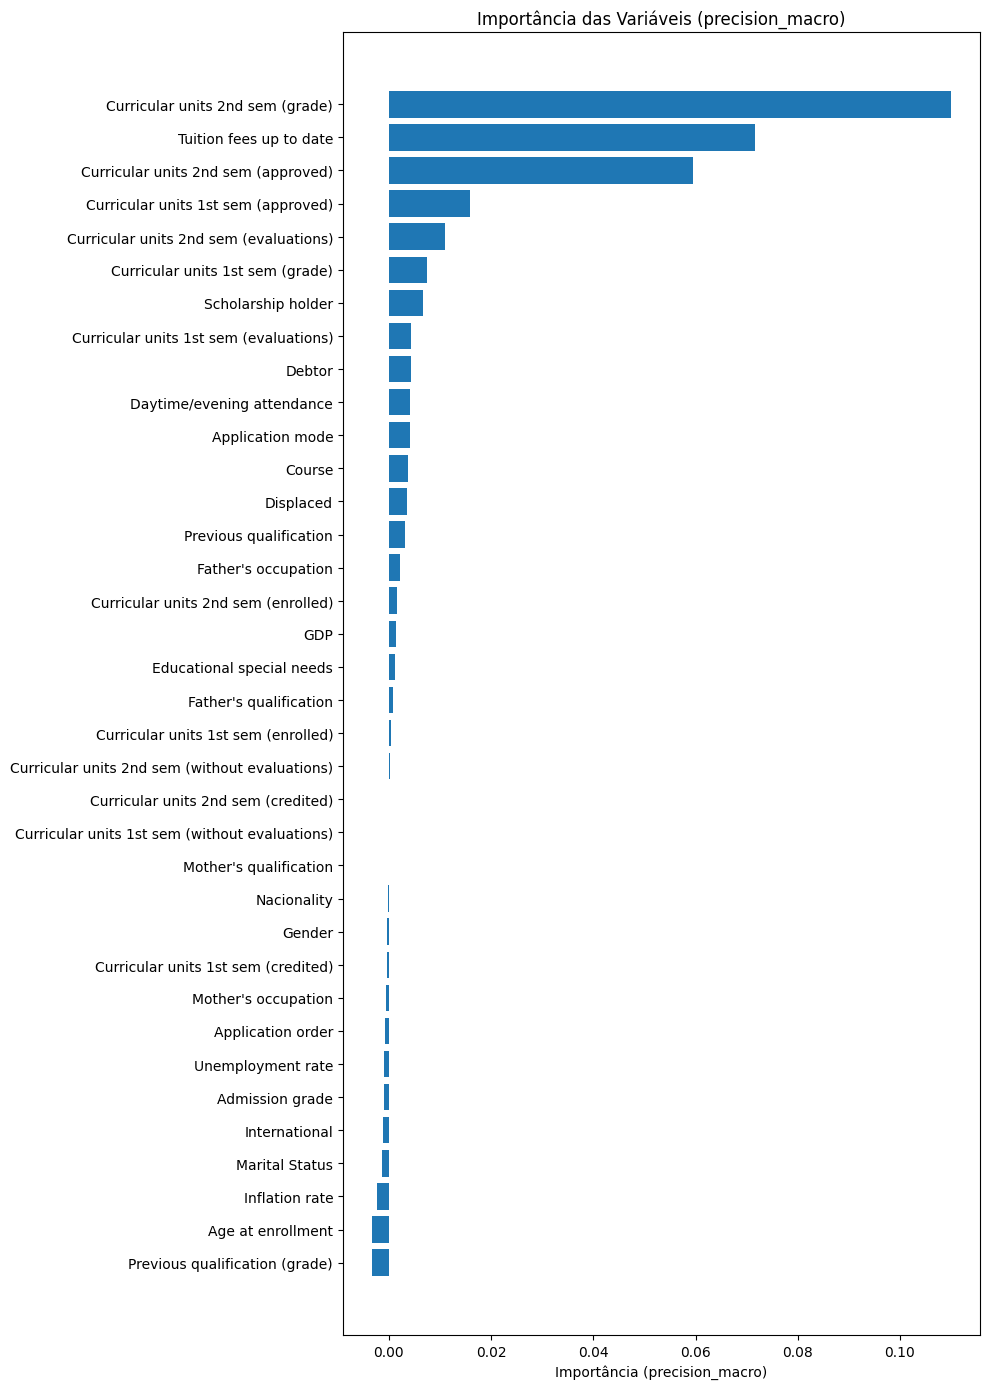

In [169]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Lista de métricas a comparar
metricas = ['accuracy', 'recall_macro', 'f1_macro', 'precision_macro']

# Dicionário para guardar os rankings de cada métrica
importancias = {}

for metrica in metricas:
    result = permutation_importance(
        modelo,        # seu modelo já treinado
        X_test,        # conjunto de teste
        y_test,        # rótulos de teste
        n_repeats=10,
        random_state=42,
        scoring=metrica
    )
    imp = pd.DataFrame({
        'feature': X_test.columns,
        f'import_{metrica}': result.importances_mean
    }).set_index('feature')
    importancias[metrica] = imp

# Junta todos os rankings em um único DataFrame
df_importancias = pd.concat(importancias.values(), axis=1)
print(df_importancias)
df_importancias.to_csv("importancias_variaveis_multimetricas.csv")

# Exibe as top 5 variáveis em cada métrica
for metrica in metricas:
    print(f"\nTop 5 variáveis para {metrica}:")
    print(df_importancias[f'import_{metrica}'].sort_values(ascending=False).head())

# Descobre quais variáveis aparecem entre as top 5 em todas as métricas
top_vars = set(df_importancias[f'import_{metricas[0]}'].sort_values(ascending=False).head(5).index)
for metrica in metricas[1:]:
    top_vars = top_vars & set(df_importancias[f'import_{metrica}'].sort_values(ascending=False).head(5).index)

print(f"\nVariáveis presentes no TOP 5 de TODAS as métricas: {list(top_vars)}")


# Opcional: gráfico comparativo (para cada métrica)
for metrica in metricas:
    plt.figure(figsize=(10, 14))
    sorted_df = df_importancias.sort_values(by=f'import_{metrica}', ascending=True)
    plt.barh(sorted_df.index, sorted_df[f'import_{metrica}'])
    plt.xlabel(f'Importância ({metrica})')
    plt.title(f'Importância das Variáveis ({metrica})')
    plt.tight_layout()
    plt.show()


In [174]:
import pandas as pd

# 'import_accuracy', 'import_recall_macro', 'import_f1_macro', 'import_precision_macro'

# Marca quais são negativas em cada métrica
metricas = ['import_accuracy', 'import_recall_macro', 'import_f1_macro', 'import_precision_macro']
for metrica in metricas:
    df_importancias[f'neg_{metrica}'] = df_importancias[metrica] < 0

# Soma em quantas métricas cada variável é ruim (negativa)
df_importancias['n_negativas'] = df_importancias[[f'neg_{m}' for m in metricas]].sum(axis=1)

# Lista variáveis RUINS (negativas em todas as métricas)
#variaveis_ruins = df_importancias[df_importancias['n_negativas'] == len(metricas)]
variaveis_ruins = df_importancias[df_importancias['n_negativas'] == len(metricas)].reset_index()

print("Variáveis RUINS (negativas em TODAS as métricas):")
print(variaveis_ruins[['feature'] + metricas])

# Lista variáveis negativas em 3 ou mais métricas (opcional)
variaveis_bem_ruins = df_importancias[df_importancias['n_negativas'] >= 3].reset_index()
print("\nVariáveis negativas em 3 ou mais métricas:")
print(variaveis_bem_ruins[['feature'] + metricas])


Variáveis RUINS (negativas em TODAS as métricas):
                               feature  import_accuracy  import_recall_macro  \
0                       Marital Status        -0.000181            -0.001553   
1                    Application order        -0.001085            -0.001428   
2       Previous qualification (grade)        -0.001989            -0.002868   
3                          Nacionality        -0.000181            -0.000121   
4                  Mother's occupation        -0.001175            -0.001140   
5                      Admission grade        -0.001537            -0.001790   
6                    Age at enrollment        -0.000181            -0.002483   
7                        International        -0.001175            -0.001535   
8  Curricular units 1st sem (credited)        -0.000271            -0.000295   
9                       Inflation rate        -0.001899            -0.002828   

   import_f1_macro  import_precision_macro  
0        -0.001056      

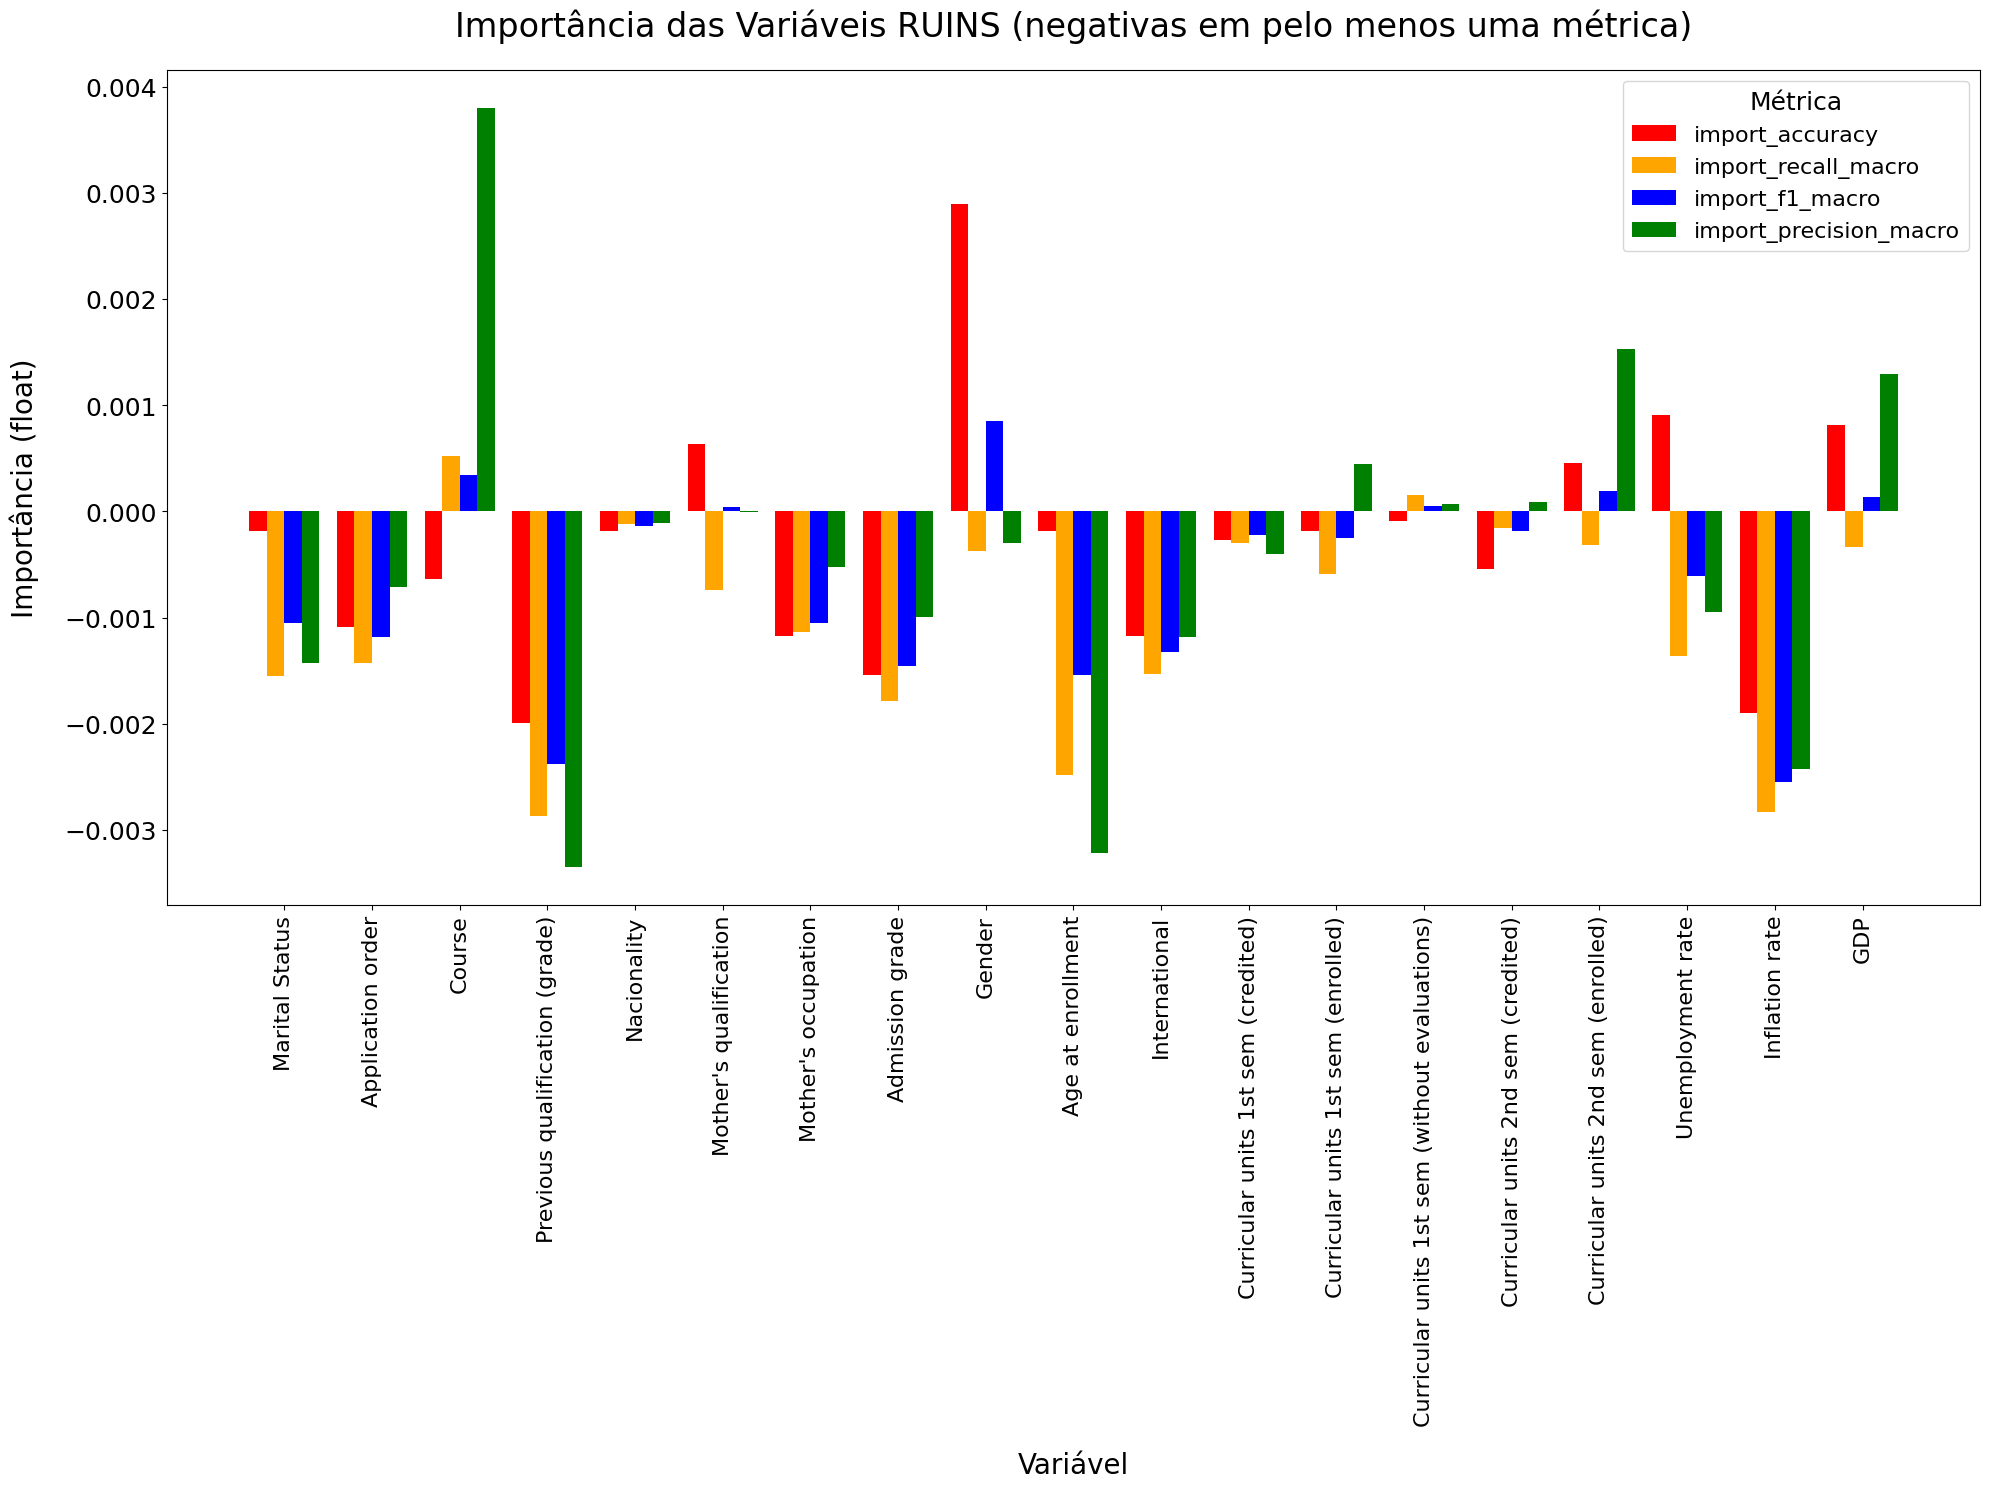

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supondo que df_importancias já tem índice as variáveis, caso não:
if 'feature' in df_importancias.columns:
    df_importancias = df_importancias.set_index('feature')

metricas = ['import_accuracy', 'import_recall_macro', 'import_f1_macro', 'import_precision_macro']

# Filtra apenas variáveis com importância negativa em pelo menos uma métrica
ruins_mask = (df_importancias[metricas] < 0).any(axis=1)
df_ruins = df_importancias.loc[ruins_mask, metricas]

x = np.arange(len(df_ruins.index))  # posição das variáveis no eixo x
width = 0.2  # largura de cada barra

plt.figure(figsize=(max(20, len(df_ruins)//2), 15))

colors = ['red', 'orange', 'blue', 'green']
for i, metrica in enumerate(metricas):
    plt.bar(x + i*width, df_ruins[metrica], width, label=metrica, color=colors[i])





plt.xticks(x + 1.5*width, df_ruins.index, rotation=90, fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel("Variável", fontsize=20, labelpad=18)
plt.ylabel("Importância (float)", fontsize=20, labelpad=18)
plt.title("Importância das Variáveis RUINS (negativas em pelo menos uma métrica)", fontsize=24, pad=24)
plt.legend(title="Métrica", fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.show()
# plt.xticks(x + 1.5*width, df_ruins.index, rotation=90)
# plt.xlabel("Variável")
# plt.ylabel("Importância (float, pode ser negativa ou positiva)")
# plt.title("Importância das Variáveis RUINS (negativas em pelo menos uma métrica)")
# plt.legend(title="Métrica")
# plt.tight_layout()
# plt.show()




In [185]:
import pandas as pd

# Supondo que df_importancias está indexado pelas variáveis ('feature')
metricas = ['import_accuracy', 'import_recall_macro', 'import_f1_macro', 'import_precision_macro']

# Identifica variáveis com valor negativo em TODAS as 4 métricas
ruins_absolutas = df_importancias[(df_importancias[metricas] < 0).all(axis=1)].index.tolist()

print("Variáveis RUINS absolutas:", ruins_absolutas)

# Agora, supondo que X_train, X_test, etc têm as mesmas colunas/nomes das variáveis:
# Remove as variáveis RUINS absolutas dos conjuntos de atributos

X_train_sem_ruins = X_train.drop(columns=ruins_absolutas)
X_test_sem_ruins = X_test.drop(columns=ruins_absolutas)

# Se quiser atualizar também X e X_orig:
# X = X.drop(columns=ruins_absolutas)
# X_orig = X_orig.drop(columns=ruins_absolutas)


Variáveis RUINS absolutas: ['Marital Status', 'Application order', 'Previous qualification (grade)', 'Nacionality', "Mother's occupation", 'Admission grade', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Inflation rate']


In [190]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

# Cria e treina o modelo SVM com balanceamento automático das classes
treinador = svm.SVC(class_weight='balanced')

# Treinamento
modelo = treinador.fit(X_train_sem_ruins, y_train)

# Predição com os dados de treino
y_pred = modelo.predict(X_train_sem_ruins)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

# Predição com os dados de teste
y2_pred = modelo.predict(X_test_sem_ruins)
cm_test = confusion_matrix(y_test, y2_pred)
print('Matriz de confusão - com os dados TRATADOS usados para TESTES')
print(cm_test)
print(classification_report(y_test, y2_pred))


Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO
[[ 713  252  101]
 [  53  418  124]
 [  49  246 1362]]
              precision    recall  f1-score   support

     Dropout       0.87      0.67      0.76      1066
    Enrolled       0.46      0.70      0.55       595
    Graduate       0.86      0.82      0.84      1657

    accuracy                           0.75      3318
   macro avg       0.73      0.73      0.72      3318
weighted avg       0.79      0.75      0.76      3318

Matriz de confusão - com os dados TRATADOS usados para TESTES
[[237  83  35]
 [ 28 121  50]
 [ 16  81 455]]
              precision    recall  f1-score   support

     Dropout       0.84      0.67      0.75       355
    Enrolled       0.42      0.61      0.50       199
    Graduate       0.84      0.82      0.83       552

    accuracy                           0.74      1106
   macro avg       0.70      0.70      0.69      1106
weighted avg       0.77      0.74      0.75      1106



In [191]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

# Modelo com todas as variáveis
modelo_full = svm.SVC(class_weight='balanced')
modelo_full.fit(X_train, y_train)

# Treino
y_pred_full = modelo_full.predict(X_train)
print('TREINAMENTO - Todas as variáveis')
print(confusion_matrix(y_train, y_pred_full))
print(classification_report(y_train, y_pred_full))

# Teste
y_test_pred_full = modelo_full.predict(X_test)
print('TESTE - Todas as variáveis')
print(confusion_matrix(y_test, y_test_pred_full))
print(classification_report(y_test, y_test_pred_full))


TREINAMENTO - Todas as variáveis
[[ 729  240   97]
 [  49  433  113]
 [  51  249 1357]]
              precision    recall  f1-score   support

     Dropout       0.88      0.68      0.77      1066
    Enrolled       0.47      0.73      0.57       595
    Graduate       0.87      0.82      0.84      1657

    accuracy                           0.76      3318
   macro avg       0.74      0.74      0.73      3318
weighted avg       0.80      0.76      0.77      3318

TESTE - Todas as variáveis
[[237  82  36]
 [ 31 115  53]
 [ 14  90 448]]
              precision    recall  f1-score   support

     Dropout       0.84      0.67      0.74       355
    Enrolled       0.40      0.58      0.47       199
    Graduate       0.83      0.81      0.82       552

    accuracy                           0.72      1106
   macro avg       0.69      0.69      0.68      1106
weighted avg       0.76      0.72      0.73      1106



In [192]:
# Modelo SEM as variáveis RUINS absolutas
modelo_sem_ruins = svm.SVC(class_weight='balanced')
modelo_sem_ruins.fit(X_train_sem_ruins, y_train)

# Treino
y_pred_sem_ruins = modelo_sem_ruins.predict(X_train_sem_ruins)
print('TREINAMENTO - SEM variáveis RUINS')
print(confusion_matrix(y_train, y_pred_sem_ruins))
print(classification_report(y_train, y_pred_sem_ruins))

# Teste
y_test_pred_sem_ruins = modelo_sem_ruins.predict(X_test_sem_ruins)
print('TESTE - SEM variáveis RUINS')
print(confusion_matrix(y_test, y_test_pred_sem_ruins))
print(classification_report(y_test, y_test_pred_sem_ruins))

TREINAMENTO - SEM variáveis RUINS
[[ 713  252  101]
 [  53  418  124]
 [  49  246 1362]]
              precision    recall  f1-score   support

     Dropout       0.87      0.67      0.76      1066
    Enrolled       0.46      0.70      0.55       595
    Graduate       0.86      0.82      0.84      1657

    accuracy                           0.75      3318
   macro avg       0.73      0.73      0.72      3318
weighted avg       0.79      0.75      0.76      3318

TESTE - SEM variáveis RUINS
[[237  83  35]
 [ 28 121  50]
 [ 16  81 455]]
              precision    recall  f1-score   support

     Dropout       0.84      0.67      0.75       355
    Enrolled       0.42      0.61      0.50       199
    Graduate       0.84      0.82      0.83       552

    accuracy                           0.74      1106
   macro avg       0.70      0.70      0.69      1106
weighted avg       0.77      0.74      0.75      1106



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(
    SVC(),
    param_grid,
    scoring='accuracy',  # Otimizando acurácia
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)
#grid.fit(X_train_sem_ruins, y_train)

print("Melhores parâmetros encontrados:", grid.best_params_)
print("Melhor acurácia média na validação cruzada:", grid.best_score_)

# Avalie no conjunto de teste
y_pred = grid.predict(X_test)
#y_pred = grid.predict(X_test_sem_ruins)

from sklearn.metrics import accuracy_score
print("Acurácia no TESTE:", accuracy_score(y_test, y_pred))




Fitting 3 folds for each of 60 candidates, totalling 180 fits
Melhores parâmetros encontrados: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
Melhor acurácia média na validação cruzada: 0.7329716696805303
Acurácia no TESTE: 0.7377938517179023
